In [1]:
from Scripts import profiling as pf, preprocessing as prep, loading as dl
from Scripts import cleaning as cl

In [2]:
# Loading data
schema_link = '../Data/movie_reviews.csv'
schema_df = dl.load_schema_full(schema_link)

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
# Display general information
pf.get_review_count(schema_df)
pf.get_descr(schema_df)

Amount of reviews:  76958
                                                     text         label
count                                               76958  74309.000000
unique                                              76958           NaN
top     A little predictable in places, but explores f...           NaN
freq                                                    1           NaN
mean                                                  NaN      3.113512
std                                                   NaN      1.356837
min                                                   NaN      1.000000
25%                                                   NaN      2.000000
50%                                                   NaN      3.000000
75%                                                   NaN      4.000000
max                                                   NaN      5.000000


In [4]:
# Further cleaning
schema_df = cl.remove_duplicates(schema_df)
schema_df = cl.remove_dup_text(schema_df)

Before deleting duplicate entries:  76958
After deleting duplicate entries:  76958
Before deleting duplicate review texts:  76958
After deleting duplicate review texts:  76958


The longest review text in our sample has 7744 words.
Longest review text:

75625    For The Adventures of Robin Hood, Warner Bros....
Name: text, dtype: object
The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 8 times.
3914               "Scary"@en
35832                \nUgh.\n
37495         \nHowlarious.\n
39364    \n...trainwreck...\n
42601      \n...amateurish.\n
45622     \n...train-wreck.\n
57553                   Nope.
57847                 Risible
Name: text, dtype: object


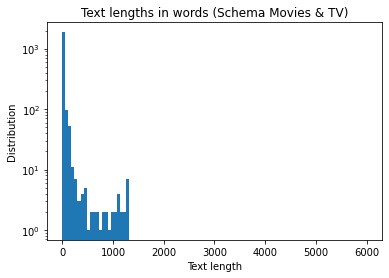

In [5]:
# Word counting
schema_df = pf.create_word_count(schema_df)
pf.get_longest_review(schema_df)
pf.get_shortest_review(schema_df)
pf.show_word_length_dist(schema_df, 'schema_movie_textlength_raw_logarithmic', 'Schema Movies & TV', True)

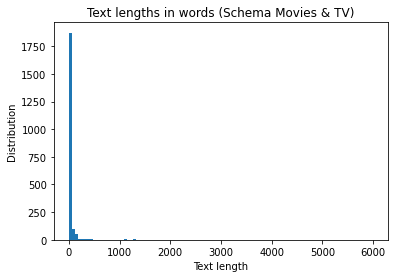

In [6]:
pf.show_word_length_dist(schema_df, 'schema_movie_textlength_raw', 'Schema Movies & TV', False)

In [ ]:
# Rating distribution
pf.show_rating_dist(schema_df, 'schema_movie_class_dist_raw')

In [ ]:
pf.show_word_length_per_label(schema_df) #interactive plot

In [ ]:
# After preprocessing
schema_df.text = prep.preprocess_reviews(schema_df.text)

In [10]:
schema_df.head()

,text,label,word_count
0,shot ever beauti chittagong textur film but ma...,3.0,57
1,film need watch forget would tragic en us,4.0,21
2,chittagong fall well short great film not help...,3.0,26
3,absolut must watch en us,4.0,6
4,make chittagong particularli special way depic...,4.0,46


In [13]:
schema_df[schema_df['text'].isin(schema_df['text'][schema_df['text'].duplicated()])]

,text,label,word_count
2,chittagong fall well short great film not help...,3.0,26
6,well craft compel en us,3.0,5
48,nawazuddin siddiqui capabl carri film shoulder...,2.0,22
49,film like sixer golf field irrelev unnecessari...,2.0,23
50,despit clich melodrama found freaki ali worth ...,3.0,34
...,...,...,...
75527,wish film braver intent creat realli crack rom...,2.0,26
75567,come away mix feel even though realli love ide...,2.0,22
75603,hormon crazi romant comedi let tepid direct,2.0,12
75654,review current post patreon support deep focu ...,2.0,67
